In [38]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import requests as re
from matplotlib import cm
sns.set(style="darkgrid")

In [2]:
df1 = pd.read_excel('../data/NSSCrisisv.1.xlsx', 'in') # 2020-2021
df2 = pd.read_excel('../data/NSSCrisisv.2.xlsx', 'in') # 2022
# df_2020 = pd.read_excel('../data/2020callcenter.xlsx')
# df_2021 = pd.read_excel('../data/2021callcenter.xlsx')
# df_2022 = pd.read_excel('../data/2022callcenter.xlsx')

In [3]:
# Rob: Change name of CRISIS Subjective in v2 to CRISIS Issues to match v1
labels = list()
for col in df2.columns:
    labels.append(col.replace('Subjective', 'Issues'))
df2.columns = labels

In [4]:
# Rob: Drops columns that contain only NaN
df1.dropna(how='all', axis=1, inplace=True)
df2.dropna(how='all', axis=1, inplace=True)

In [5]:
samecolumnsdf = pd.DataFrame(df1.columns.intersection(df2.columns))
samecolumnsdf

,0
0,CallReportNum
1,ReportVersion
2,LinkedToCallReportNum
3,CallDateAndTimeStart
4,CallDateAndTimeEnd
5,CallLength
6,CallerNum
7,PhoneWorkerNum
8,PhoneWorkerName
9,PostalCode


In [6]:
# Rob: Loop that grabs columns we want and puts it into one df
filter_col1 = [col for col in df1 if col.startswith('CRISIS Issues') or col.startswith('Call')]
df1_ci = df1[filter_col1]

In [7]:
# Rob: Loop that grabs columns we want and puts it into one df
filter_col2 = [col for col in df2 if col.startswith('CRISIS Issues') or col.startswith('Call')]
df2_ci = df2[filter_col2]

In [8]:
all_ci = pd.concat([df1_ci, df2_ci])
all_ci.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63524 entries, 0 to 10647
Data columns (total 19 columns):
 #   Column                                          Non-Null Count  Dtype         
---  ------                                          --------------  -----         
 0   CallReportNum                                   63524 non-null  int64         
 1   CallDateAndTimeStart                            63524 non-null  datetime64[ns]
 2   CallDateAndTimeEnd                              63524 non-null  datetime64[ns]
 3   CallLength                                      63524 non-null  int64         
 4   CallerNum                                       63524 non-null  int64         
 5   CallersFeedback                                 200 non-null    object        
 6   CRISIS Issues - Abusive Behavior                2505 non-null   object        
 7   CRISIS Issues - Emotional State                 42713 non-null  object        
 8   CRISIS Issues - Financial/Basic Needs         

In [9]:
all_ci2=all_ci.dropna(subset=['CRISIS Issues - Suicide']) #drops all rows where there are NAs in these columns

In [10]:
all_ci2.info() #5151 calls have a non-null value in CRISIS ISsues - Suicide

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5151 entries, 48 to 10646
Data columns (total 19 columns):
 #   Column                                          Non-Null Count  Dtype         
---  ------                                          --------------  -----         
 0   CallReportNum                                   5151 non-null   int64         
 1   CallDateAndTimeStart                            5151 non-null   datetime64[ns]
 2   CallDateAndTimeEnd                              5151 non-null   datetime64[ns]
 3   CallLength                                      5151 non-null   int64         
 4   CallerNum                                       5151 non-null   int64         
 5   CallersFeedback                                 41 non-null     object        
 6   CRISIS Issues - Abusive Behavior                391 non-null    object        
 7   CRISIS Issues - Emotional State                 4020 non-null   object        
 8   CRISIS Issues - Financial/Basic Needs         

In [11]:
all_ci3=all_ci2.dropna(subset=['CRISIS Issues - Abusive Behavior']) #391 calls mention Suicide and Abusive behavior 

In [12]:
all_ci3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 391 entries, 74 to 10608
Data columns (total 19 columns):
 #   Column                                          Non-Null Count  Dtype         
---  ------                                          --------------  -----         
 0   CallReportNum                                   391 non-null    int64         
 1   CallDateAndTimeStart                            391 non-null    datetime64[ns]
 2   CallDateAndTimeEnd                              391 non-null    datetime64[ns]
 3   CallLength                                      391 non-null    int64         
 4   CallerNum                                       391 non-null    int64         
 5   CallersFeedback                                 3 non-null      object        
 6   CRISIS Issues - Abusive Behavior                391 non-null    object        
 7   CRISIS Issues - Emotional State                 345 non-null    object        
 8   CRISIS Issues - Financial/Basic Needs          

In [13]:
all_ci4=all_ci3.loc[(all_ci3['CRISIS Issues - Suicide']!='Third party concerned about anothers suicide risk')] #excludes third party calls 
all_ci4.info() #down to 384 calls 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 384 entries, 74 to 10608
Data columns (total 19 columns):
 #   Column                                          Non-Null Count  Dtype         
---  ------                                          --------------  -----         
 0   CallReportNum                                   384 non-null    int64         
 1   CallDateAndTimeStart                            384 non-null    datetime64[ns]
 2   CallDateAndTimeEnd                              384 non-null    datetime64[ns]
 3   CallLength                                      384 non-null    int64         
 4   CallerNum                                       384 non-null    int64         
 5   CallersFeedback                                 3 non-null      object        
 6   CRISIS Issues - Abusive Behavior                384 non-null    object        
 7   CRISIS Issues - Emotional State                 341 non-null    object        
 8   CRISIS Issues - Financial/Basic Needs          

In [14]:
all_ci4['CRISIS Issues - Abusive Behavior'].value_counts()

Adult Abused as a Child                                                                                                                 69
Rape/Sexual Abuse                                                                                                                       41
Abuse/Neglect of Spouse/Partner                                                                                                         33
Bullying                                                                                                                                29
Other Abusive Behavior                                                                                                                  16
Adult Abused as a Child; Rape/Sexual Abuse                                                                                              14
Abuse/Neglect of Parent/Other Family                                                                                                    11
Child Sexual Abuse         

In [15]:
new_df=all_ci4['CRISIS Issues - Abusive Behavior'].str.split('; ', expand=True)
new_df

,0,1,2,3,4
74,Rape/Sexual Abuse,None,None,None,None
86,Rape/Sexual Abuse,None,None,None,None
272,Harassment,Bullying,None,None,None
392,Cult/Ritualistic Abuse,None,None,None,None
582,Rape/Sexual Abuse,None,None,None,None
668,Adult Abused as a Child,Rape/Sexual Abuse,None,None,None
767,Abuse/Neglect of Spouse/Partner,None,None,None,None
799,Bullying,None,None,None,None
857,Abuse/Neglect of Spouse/Partner,None,None,None,None
1271,Rape/Sexual Abuse,None,None,None,None


In [16]:
melted=new_df.melt().value.value_counts()

In [17]:
print(type(melted))

<class 'pandas.core.series.Series'>


In [18]:
melteddf = melted.to_frame()
melteddf

,value
Adult Abused as a Child,142
Rape/Sexual Abuse,92
Abuse/Neglect of Spouse/Partner,58
Other Abusive Behavior,57
Bullying,54
Abuse/Neglect of Parent/Other Family,47
Child Sexual Abuse,30
Other Physical Abuse/Neglect,30
Harassment,28
Child Abuse/Neglect,19


In [19]:
finaldf=melteddf.reset_index()
finaldf

,index,value
0,Adult Abused as a Child,142
1,Rape/Sexual Abuse,92
2,Abuse/Neglect of Spouse/Partner,58
3,Other Abusive Behavior,57
4,Bullying,54
5,Abuse/Neglect of Parent/Other Family,47
6,Child Sexual Abuse,30
7,Other Physical Abuse/Neglect,30
8,Harassment,28
9,Child Abuse/Neglect,19


sicorrelations=finaldf['index'].value_counts().rename_axis('unique_values').reset_index(name='counts')
sicorrelations

In [20]:
finaldf['pctoccurence']=(finaldf['value']/599)*100

In [21]:
finaldf
finaldf=finaldf.sort_values(by='value', ascending=True) 

In [22]:
ticks=np.arange(0,26,step=2)

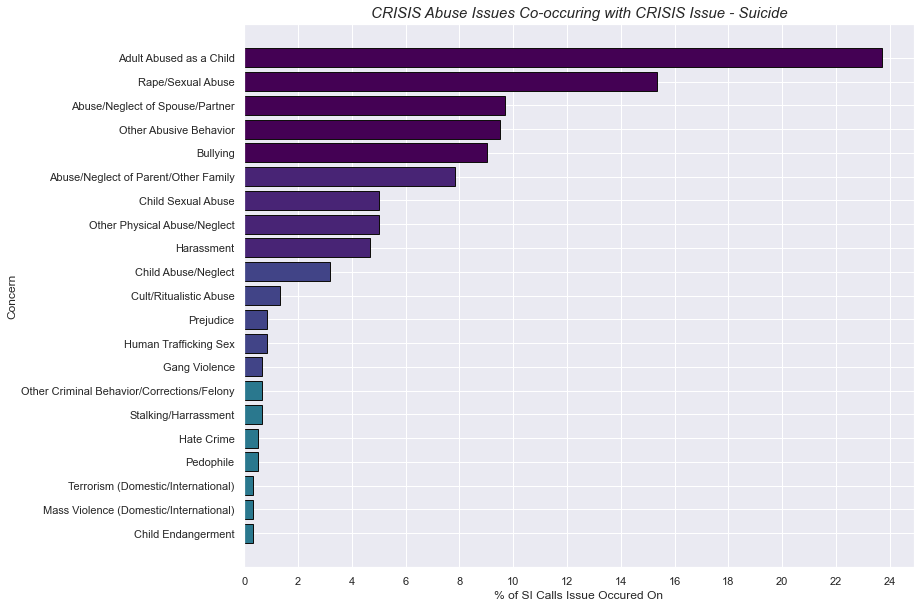

In [36]:
plt.subplots(figsize=(12,10))
y=finaldf['pctoccurence'] #test=music_df.loc[(music_df['UsePeriod']==' ')]
x=finaldf['index']
plt.barh(x,y,align='center',edgecolor="#0f0e0c",color=['#2a788e','#2a788e','#2a788e','#2a788e','#2a788e','#2a788e','#2a788e','#414487','#414487','#414487','#414487','#414487','#482475','#482475','#482475','#482475','#440154','#440154','#440154','#440154','#440154'])
plt.xticks(ticks)
plt.title('CRISIS Abuse Issues Co-occuring with CRISIS Issue - Suicide', fontsize=15, fontstyle='oblique')
plt.ylabel('Concern')
plt.xlabel('% of SI Calls Issue Occured On')
plt.show()

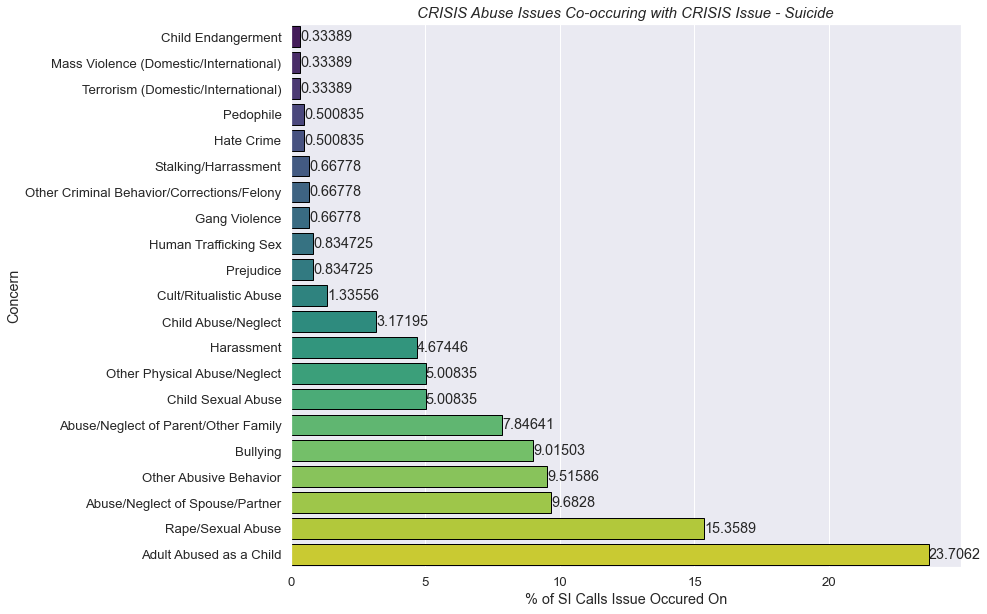

In [26]:
plt.subplots(figsize=(12,10))
sns.set(style="whitegrid")
sns.set(font_scale=1.2)
y=finaldf['pctoccurence']
x=finaldf['index']
ax = sns.barplot(x=y, y=x, data=finaldf,
            label="Total", palette=sns.color_palette('viridis', n_colors=21), edgecolor='black', order=df.sort_values('Salary',ascending = False).Education))
ax.bar_label(ax.containers[0])
plt.title('CRISIS Abuse Issues Co-occuring with CRISIS Issue - Suicide', fontsize=15, fontstyle='oblique')
plt.ylabel('Concern')
plt.xlabel('% of SI Calls Issue Occured On');

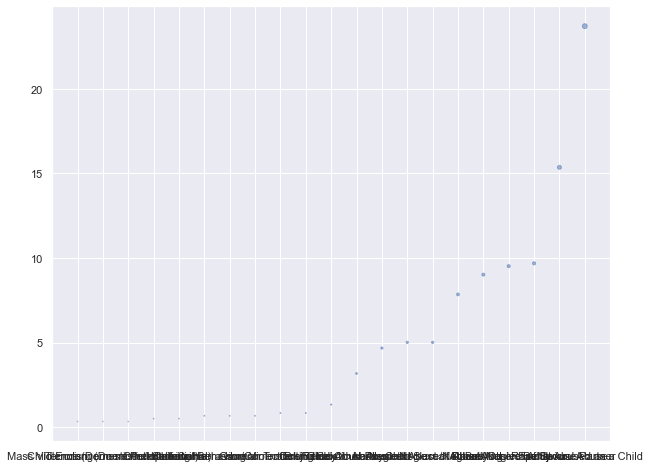

In [24]:
plt.subplots(figsize=(10, 8))
plt.scatter(x, y, s=y, alpha=0.5)
plt.show()